# Blob detection

A common procedure for local maxima detection on processed images is called Blob detection. It is typically applied to Difference-of-Gaussian (DoG), Laplacian-of-Gaussian (LoG) and Determinant-of-Hessian (DoH) images. We will use [scikit-image](https://scikit-image.org) functions for that. The advantage of these methods is that no pre-processing is necessary, it is built-in.

See also
* [Blob detection (scikit-image tutorial)](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html)
* [Spot detection and tracking (video)](https://www.youtube.com/watch?v=q6-NsNvu81w)

In [1]:
from skimage.feature import blob_dog, blob_log, blob_doh

import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
from skimage.filters import gaussian 
import matplotlib.pyplot as plt

We start by loading an image and cropping a region for demonstration purposes. We used image set [BBBC007v1](https://bbbc.broadinstitute.org/BBBC007) image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

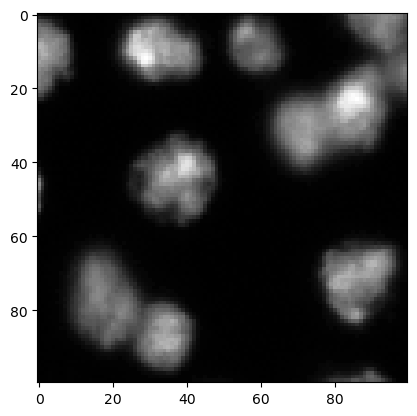

In [2]:
image = imread("../../data/BBBC007_batch/A9 p7d.tif")[-100:, 0:100]

cle.imshow(image)

For technial reasons it is important to convert the pixel type of this image first ([see this discussion](https://forum.image.sc/t/how-to-use-scikit-images-blob-dog/75150)) and [this github issue](https://github.com/scikit-image/scikit-image/issues/6657).

In [3]:
image = image.astype(float)

## Difference-of-Gaussian (DoG)

The DoG technique consists of two Gaussian-blur operations applied to an image. The resulting images are subtracted from each other resulting in an image where objects smaller and larger than a defined size or `sigma` range are removed. In this image, local maxima are detected. Read more in the documentation of [`blob_dog`](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_dog).

In [4]:
coordinates_dog = blob_dog(image, min_sigma=1, max_sigma=10, threshold=1)
coordinates_dog

array([[10.    , 30.    ,  4.096 ],
       [24.    , 85.    ,  4.096 ],
       [42.    , 39.    ,  4.096 ],
       [11.    ,  0.    ,  4.096 ],
       [87.    , 35.    ,  4.096 ],
       [71.    , 85.    ,  4.096 ],
       [32.    , 71.    ,  4.096 ],
       [46.    ,  0.    ,  1.    ],
       [ 9.    , 58.    ,  4.096 ],
       [78.    , 18.    ,  6.5536],
       [81.    , 85.    ,  1.6   ],
       [99.    , 90.    ,  2.56  ],
       [ 0.    , 99.    ,  6.5536],
       [51.    , 41.    ,  1.6   ],
       [52.    ,  0.    ,  1.    ],
       [16.    , 99.    ,  1.6   ],
       [99.    , 81.    ,  1.6   ],
       [41.    , 27.    ,  1.    ],
       [34.    , 37.    ,  1.    ],
       [16.    ,  8.    ,  1.    ],
       [46.    , 25.    ,  1.    ],
       [99.    , 49.    ,  1.    ],
       [99.    , 45.    ,  1.    ]])

In [5]:
coordinates_dog.shape

(23, 3)

This array contains coordinates in x and y and the sigma corresponding to the maximum. We can extract the list of coordinates and visualize it.

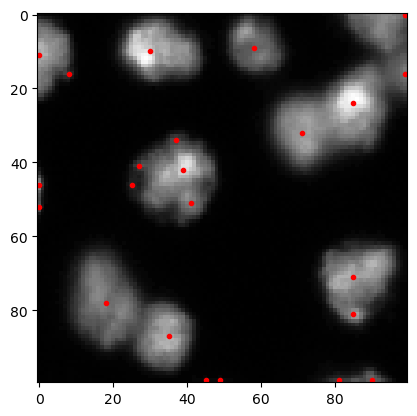

In [6]:
cle.imshow(image, continue_drawing=True)
plt.plot(coordinates_dog[:, 1], coordinates_dog[:, 0], 'r.')

## Laplacian-of-Gaussian (LoG)
The LoG technique is a Laplacian kernel applied to a Gaussian blurred image. In the resulting image, objects with a given size can be detected more easily because noise has been remove and edges enhanced.

In [7]:
coordinates_log = blob_log(image, min_sigma=1, max_sigma=10, num_sigma=10, threshold=1)
coordinates_log

array([[10., 30.,  5.],
       [23., 85.,  4.],
       [43., 38.,  6.],
       [11.,  0.,  6.],
       [71., 85.,  6.],
       [87., 35.,  5.],
       [ 9., 58.,  5.],
       [46.,  0.,  1.],
       [77., 17.,  7.],
       [81., 85.,  2.],
       [99., 90.,  3.],
       [ 0., 99.,  8.],
       [51., 41.,  2.],
       [52.,  0.,  1.],
       [16., 99.,  3.],
       [87., 19.,  2.],
       [99., 81.,  2.],
       [41., 27.,  1.],
       [34., 36.,  1.],
       [56., 38.,  1.],
       [17.,  8.,  1.],
       [46., 25.,  1.],
       [35., 44.,  1.],
       [56., 33.,  1.],
       [62., 83.,  1.],
       [99., 49.,  2.],
       [99., 45.,  1.],
       [82., 95.,  1.],
       [99., 42.,  1.]])

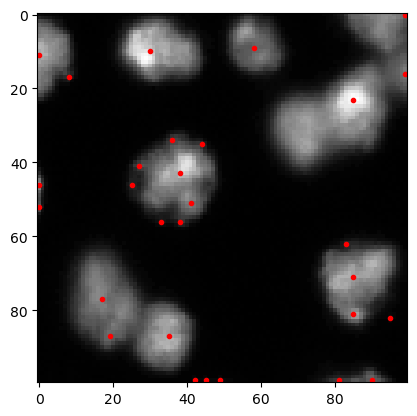

In [8]:
cle.imshow(image, continue_drawing=True)
plt.plot(coordinates_log[:, 1], coordinates_log[:, 0], 'r.')

## Determinant-of-Hessian (DoH)

This approach works by determining maxima in the Hessian determinant image of a Gaussian blurred image of the original ([read more](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_doh)).

In [9]:
coordinates_doh = blob_doh(image, min_sigma=1, max_sigma=10, num_sigma=10, threshold=1)
coordinates_doh

array([[25., 85., 10.],
       [43., 37., 10.],
       [86., 34.,  8.],
       [71., 85., 10.],
       [ 0., 30., 10.],
       [31., 70.,  9.],
       [ 0., 77., 10.],
       [76., 16., 10.],
       [ 0., 57.,  9.],
       [ 1., 93.,  5.],
       [97., 89.,  3.],
       [ 0., 44.,  6.],
       [71., 29.,  9.],
       [ 0.,  0.,  9.],
       [19., 16., 10.],
       [95., 22.,  9.],
       [62.,  0., 10.],
       [92.,  0., 10.],
       [28., 50., 10.],
       [41., 81.,  9.],
       [30., 25., 10.],
       [59., 72., 10.],
       [43., 58., 10.],
       [85., 95.,  9.],
       [88., 74., 10.],
       [17., 34.,  5.],
       [74., 45., 10.],
       [98., 84.,  1.],
       [53., 11., 10.],
       [99., 43.,  9.],
       [35., 98.,  9.],
       [58., 49.,  9.],
       [57., 99.,  9.],
       [10., 99.,  7.],
       [57., 34.,  3.],
       [32.,  0., 10.]])

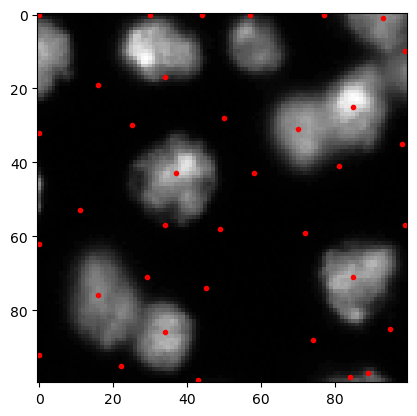

In [10]:
cle.imshow(image, continue_drawing=True)
plt.plot(coordinates_doh[:, 1], coordinates_doh[:, 0], 'r.')